In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc




In [2]:
# Load the dataset
file_path = "netflix_users_expanded.csv"
df = pd.read_csv('netflix_users_expanded.csv')


In [3]:
# Preprocessing: Handling missing values
df.dropna(inplace=True)

In [4]:
# Encoding categorical variables if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
# Splitting data into features and target (Assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Model evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9906
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        53
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        64
           8       1.00      1.00      1.00        42
           9       1.00      0.93      0.96        54
          10       1.00      1.00      1.00        52
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        52
          13       1.00      0.91      0.95        45
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00        65
          16       0.92      1.00      0

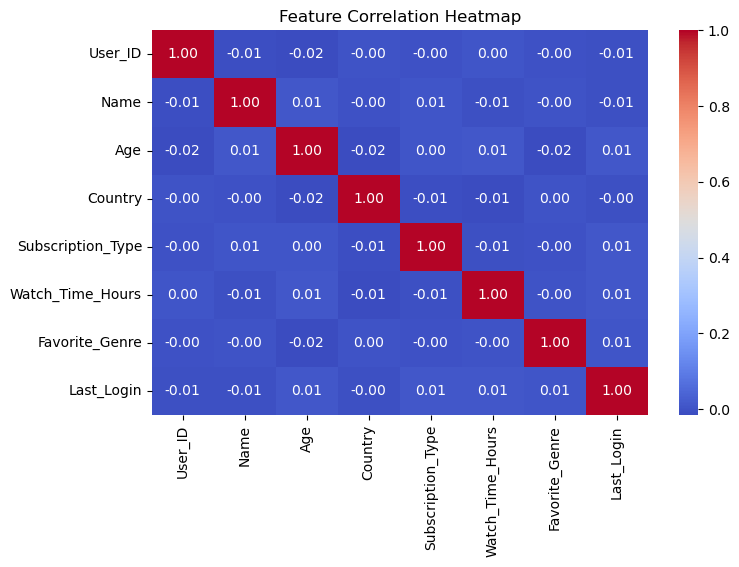

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
